# Experiment with oil well data in Santa Clarita

I started by deleting some of the columns we will not be using in excel, as we had issues initially with the size of the dataset messing up the ability to do any analysis.

In [1]:
# added pandas library
import pandas as pd
import geopandas as gpd

In [2]:
# Had pandas read the csv file of oil wells
df = pd.read_csv('Oil_Wells.csv')

In [3]:
# Wanted an initial image of the data in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22781 entries, 0 to 22780
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             22781 non-null  float64
 1   Y             22781 non-null  float64
 2   OBJECTID      22781 non-null  int64  
 3   DistrictNu    22781 non-null  object 
 4   APINumber     22781 non-null  int64  
 5   BLMWell       22781 non-null  object 
 6   DryHole       22781 non-null  object 
 7   WellStatus    22781 non-null  object 
 8   OperatorNa    22781 non-null  object 
 9   CountyName    22781 non-null  object 
 10  FieldName     22781 non-null  object 
 11  AreaName      22781 non-null  object 
 12  Section       22781 non-null  int64  
 13  Township      22781 non-null  object 
 14  Range         22781 non-null  object 
 15  BaseMeridi    22781 non-null  object 
 16  Latitude      22781 non-null  float64
 17  Longitude     22781 non-null  float64
 18  GISSourceC    22781 non-nu

One potential approach for looking at Santa Clarita specifically based on this data, would be Section, Township, Range information, which corresponds to this map [from google earth](https://www.earthpoint.us/TownshipsCalifornia.aspx). I identified T4N R16W as the center of Santa Clarita. We could put together about 7 of these regions, but I think this one is a good starting point for us to choose a snapshot in the mountains, but especially considering we're planning to combine the oil wells with other datasets, I think it makes sense to look at adding another spatial dataset with census tract and potentially neighborhood information.

# Active wells

Because the dataset was so large, we had issues with trying analyses initially. Here I create an index of just active oil wells.

In [4]:
df_act = df.drop(df[df['WellStatus'] != 'A'].index)

In [5]:
df_act.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3871 entries, 32 to 22769
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             3871 non-null   float64
 1   Y             3871 non-null   float64
 2   OBJECTID      3871 non-null   int64  
 3   DistrictNu    3871 non-null   object 
 4   APINumber     3871 non-null   int64  
 5   BLMWell       3871 non-null   object 
 6   DryHole       3871 non-null   object 
 7   WellStatus    3871 non-null   object 
 8   OperatorNa    3871 non-null   object 
 9   CountyName    3871 non-null   object 
 10  FieldName     3871 non-null   object 
 11  AreaName      3871 non-null   object 
 12  Section       3871 non-null   int64  
 13  Township      3871 non-null   object 
 14  Range         3871 non-null   object 
 15  BaseMeridi    3871 non-null   object 
 16  Latitude      3871 non-null   float64
 17  Longitude     3871 non-null   float64
 18  GISSourceC    3871 non-null   o

I also repeated this process with a geodataframe in order to have all of the options available for merging or spatial joins.

In [6]:
gdf = gpd.GeoDataFrame(df, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

I am unsure if the .index here is the right move but using for now because it was in the lecture. If we are getting errors though in joining or merging this with other things, we should try and delete the word index.

In [7]:
gdf_act = gdf.drop(gdf[gdf['WellStatus'] != 'A'].index)

In [8]:
gdf_act.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3871 entries, 32 to 22769
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   X             3871 non-null   float64 
 1   Y             3871 non-null   float64 
 2   OBJECTID      3871 non-null   int64   
 3   DistrictNu    3871 non-null   object  
 4   APINumber     3871 non-null   int64   
 5   BLMWell       3871 non-null   object  
 6   DryHole       3871 non-null   object  
 7   WellStatus    3871 non-null   object  
 8   OperatorNa    3871 non-null   object  
 9   CountyName    3871 non-null   object  
 10  FieldName     3871 non-null   object  
 11  AreaName      3871 non-null   object  
 12  Section       3871 non-null   int64   
 13  Township      3871 non-null   object  
 14  Range         3871 non-null   object  
 15  BaseMeridi    3871 non-null   object  
 16  Latitude      3871 non-null   float64 
 17  Longitude     3871 non-null   float64 
 18  GIS

In [9]:
gdf_act.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Next, I made two basic scatter maps using plotly express. One with a more basic background and one that could allow us to see more details about the environment around the active wells (and with black dots to represent the oil).

In [10]:
import plotly.express as px

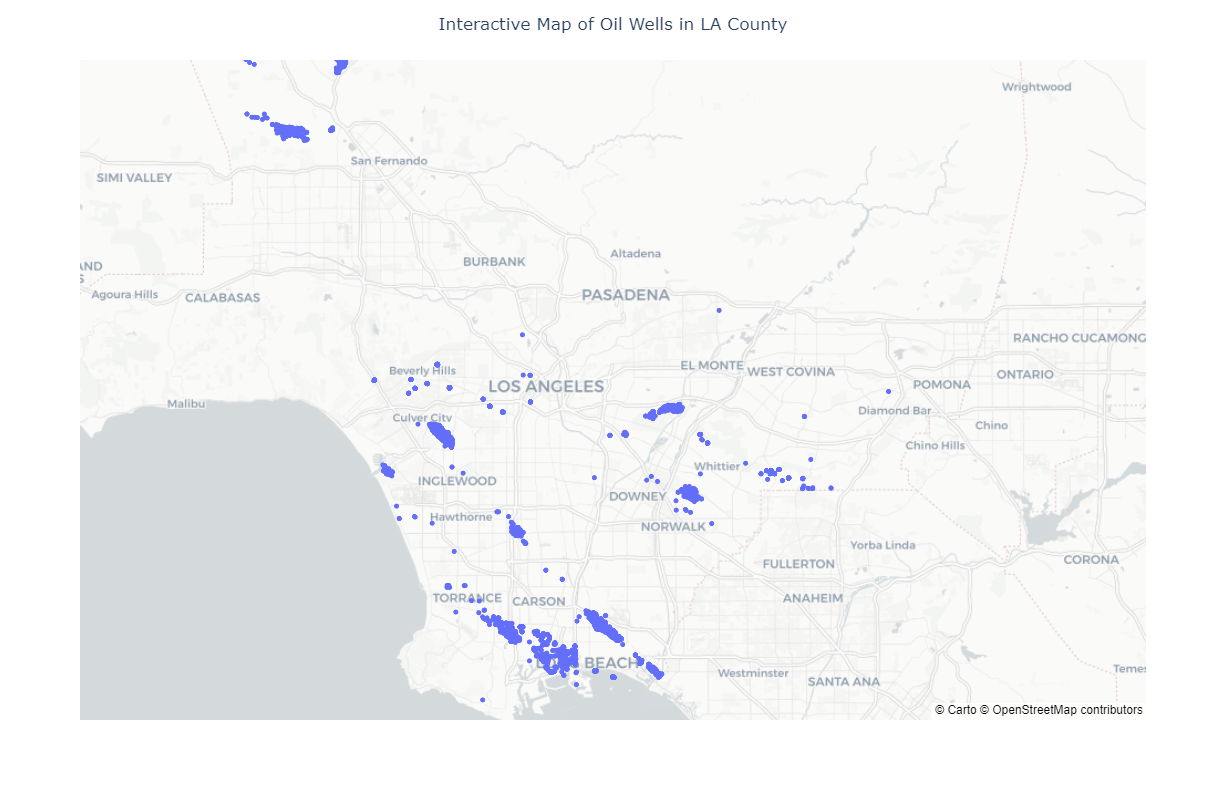

In [13]:
fig = px.scatter_mapbox(gdf_act,
                        lat='Latitude',
                        lon='Longitude',
                        mapbox_style="carto-positron")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Map of Oil Wells in LA County",
    title_x=0.5 # aligns title to center
)

fig.show()

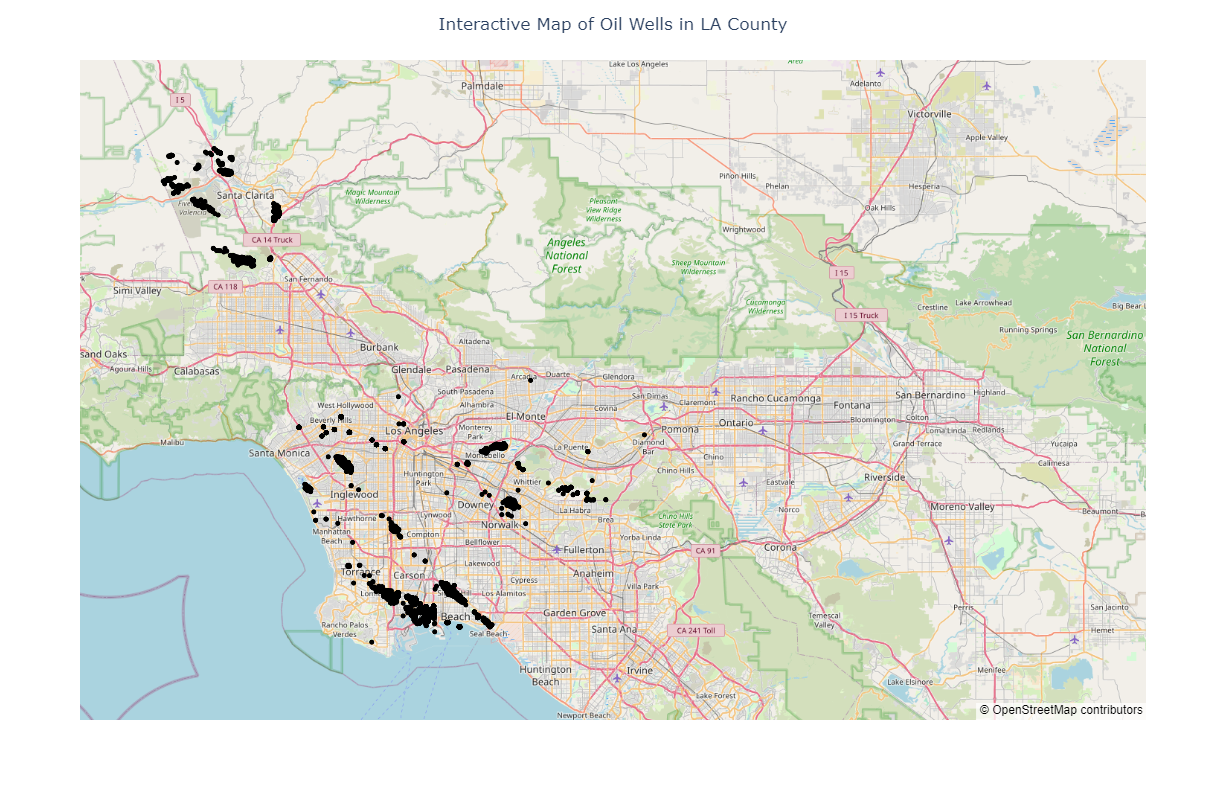

In [11]:
fig = px.scatter_mapbox(gdf_act,
                        lat='Latitude',
                        lon='Longitude',
                        color_discrete_sequence=["Black"],
                        mapbox_style="open-street-map")

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Map of Oil Wells in LA County",
    title_x=0.5 # aligns title to center
)

fig.show()

How do we save or export this?
Could also see making some charts here to analyze the data on active or even on active and non active wells.

# Census Test

In [ ]:
df = pd.read_csv('HealthCensusLA5Y2022.csv', low_memory=False,
                dtype=
                {'GEO_FIPS':str,
                })

In [ ]:
df['GEO_FIPS'] = df['GEO_FIPS'].str.zfill(11)
columns_to_keep = ['GEO_FIPS',
                   'S2701_C01_001E',
                   'S2701_C01_035E',
                   'S2701_C01_036E',
                   'S2701_C02_001E',
                   'S2701_C04_001E'] 
df2 = df[columns_to_keep]
df2.columns = ['FIPS',
'TotalPop',
'Disabled',
'NotDiabled',
'Insured',
'Uninsured']

In [ ]:
Tract_disability = df2.sort_values(by='Disabled',ascending = False)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

.plot(ax=ax, color='white', edgecolor='black')

gdf_act.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

# Joining census tract and neighborhood information
